In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
## https://www.openml.org/可以搜索到对应数据集
mnist = fetch_openml(data_home="d:/test/face",name='mnist_784')
X, y = mnist['data'], mnist['target']
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.9)
#共有7万张图片，每张图片有784个特征 784开方是28*28。
print(X.shape, y.shape)


(70000, 784) (70000,)


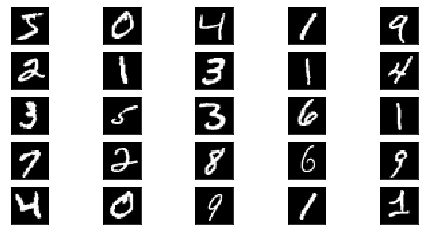

In [11]:
fig, axes = plt.subplots(5,5 #创建一个画布有3*8个子图
                         ,figsize = (8,4) #创建一个大小为8*4的黄布
                         ,subplot_kw = {"xticks":[],"yticks":[]} # 每个子图都不显示坐标轴
                        )
for i,ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap = "gray")


In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
#导入time模块 训练数据将近一分钟左右
%time knn.fit(X_train,y_train)

Wall time: 1min 2s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

预测的数字： ['2']
Wall time: 92 ms


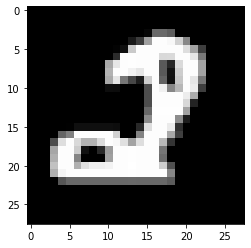

In [5]:
#获取第几个模型的测试数据，用来预测
preindex=101;
plt.imshow(X_test[preindex,].reshape(28, 28), cmap = "gray");
%time print("预测的数字：",knn.predict(X_test[preindex:preindex+1,]))
plt.show()

In [32]:
#通过测试数据获取该模型的得分。
%time print(knn.score(X_test,y_test))


0.9738571428571429
Wall time: 9min 9s


(63000, 100) (7000, 100)
Wall time: 2.75 s
预测的数字： ['7']
Wall time: 8.99 ms


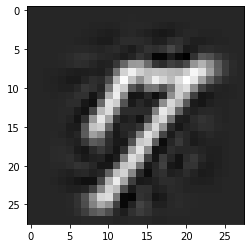

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
#保留多少个主成分维度，如果是数组是保留多少个 如果是比例 用0-1的数字，比如0.9保留90%主成分
pca = PCA(n_components=100)
#注意要transform多个 一定要调用fit方法，而不是调用两次fit_transform否则导致两次的维度不一致，fit会根据数据行算出特征的。
pca.fit(X_train,y_train)
PCA_trainmat = pca.transform(X_train)
PCA_testmat = pca.transform(X_test)
print(PCA_trainmat.shape,PCA_testmat.shape)
knn1=KNeighborsClassifier()
%time knn1.fit(PCA_trainmat,y_train)
preindex1=101;
x_inv = pca.inverse_transform(PCA_testmat) 
plt.imshow(x_inv[preindex1,].reshape(28, 28), cmap = "gray");
plt.show()

%time print("预测的数字：",knn1.predict(PCA_testmat[preindex1:preindex1+1,]))

In [22]:
%time print(knn1.score(PCA_testmat,y_test))


0.9758571428571429
Wall time: 1min 18s
